<a href="https://colab.research.google.com/github/J-Neff/MAT421/blob/main/Module_H_Section_22_1%2C_22_2%2C_22_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ODE Initial Value Problem Statement

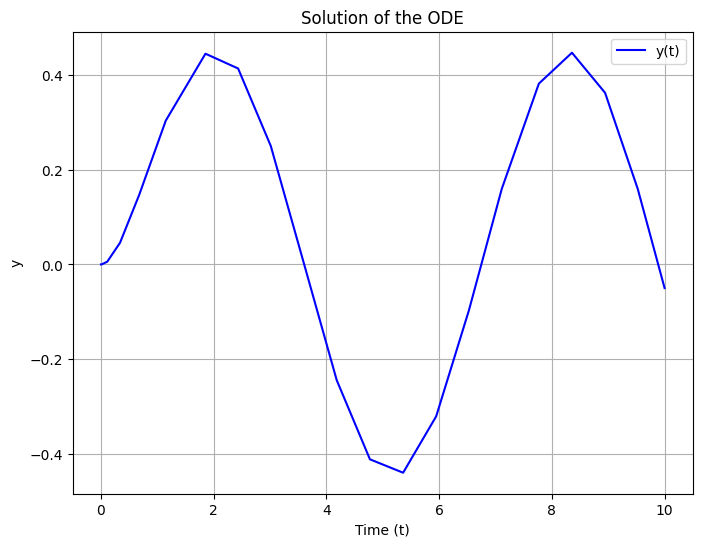

In [6]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import sympy as sp

# ODE function
def my_ode(t, y):
    # y[0] is the dependent variable
    # Return the derivative dy/dt
    return -2 * y[0] + np.sin(t)

# initial condition
y0 = [0]  # Initial value of y at t=0

# time span
t_span = (0, 10)  #  t=0 to t=10

# Solve
sol = solve_ivp(my_ode, t_span, y0)

# Extract the solution
t = sol.t  # Time points
y = sol.y[0]  # Solution for y

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t, y, 'b', label='y(t)')
plt.xlabel('Time (t)')
plt.ylabel('y')
plt.title('Solution of the ODE')
plt.legend()
plt.grid(True)
plt.show()


Reduction of Order

In [7]:
# Define the symbols
x = sp.Symbol('x')

# known solution
y1 = sp.Function('y1')(x)

# new dependent variable
v = sp.Function('v')(x)

# second solution y2 = v * y1
y2 = v * y1

# Differentiate
y2_prime = y2.diff(x)
y2_double_prime = y2_prime.diff(x)

# Substitute
p = sp.Function('p')(x)
q = sp.Function('q')(x)

ode = y2_double_prime + p * y2_prime + q * y2

# Substitute and simplify
ode = ode.subs({y2_prime: sp.diff(y2, x), y2_double_prime: sp.diff(y2_prime, x)})
ode = ode.expand().collect(v)
ode = ode.subs(y1, 1)

print("Reduced order ODE after substitution:")
print(ode)


Reduced order ODE after substitution:
(p(x) + 2*Derivative(1, x))*Derivative(v(x), x) + (p(x)*Derivative(1, x) + q(x) + Derivative(1, (x, 2)))*v(x) + Derivative(v(x), (x, 2))


The Euler Method

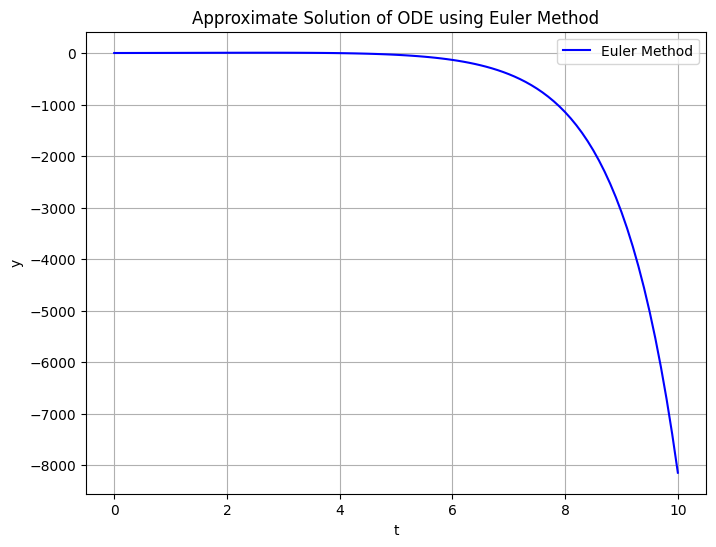

In [8]:
def euler_method(f, t0, y0, h, num_steps):
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    for _ in range(num_steps):
        slope = f(t, y)
        y = y + h * slope
        t = t + h

        t_values.append(t)
        y_values.append(y)

    return np.array(t_values), np.array(y_values)
def f(t, y):
    return y - t**2 + 1  # Example ODE

t0 = 0
y0 = 0.5
h = 0.1
num_steps = 100

t_values, y_values = euler_method(f, t0, y0, h, num_steps)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(t_values, y_values, label='Euler Method', color='blue')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Approximate Solution of ODE using Euler Method')
plt.legend()
plt.grid(True)
plt.show()
